> # Ice Games 2017 Projection Notebook Analysis
The goal of the notebook is to pin point marketing opportunities for the 2017 video gaming market.

Data featured here provided games.csv dataset.

# Step 2 Prepare the Data

## Initialize Workspace

In [1]:
# Import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

# Set notebook settings to my preference
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent DataFrame from wrapping
pd.set_option('display.width', 1000)  # Increase the width of the display area (adjust as needed)


In [2]:
# Import data

df = pd.read_csv('../games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


From the .info() details I find:
* Per project request all column names are upper, will need to address.
* Name has two missing data points. Will need to address.
* Year_of_Release should be an int. Will need to address.
* While Year_of_Release is missing data, the Scores and Rating column have the most missing information.
* Per project request a total_sales column is missing, will need to address.
* User_Score is an object for some reason.


In [3]:
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9357,Need for Speed Underground 2,DS,2005.0,Racing,0.11,0.02,0.00,0.01,65.0,7,E
10632,Indy Racing 2000,N64,2000.0,Racing,0.08,0.02,0.00,0.00,NaN,NaN,NaN
5273,Kinectimals: Now with Bears!,X360,2011.0,Misc,0.27,0.06,0.00,0.03,NaN,NaN,NaN
3541,Top Spin 3,PS3,2008.0,Action,0.08,0.36,0.00,0.12,75.0,7.5,E
5099,Yarudora Series Vol.1: Double Cast,PS,1998.0,Adventure,0.00,0.00,0.35,0.02,NaN,NaN,NaN
15593,Meiji Toukyou Renka,PSP,2013.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
11135,Test Drive: Eve of Destruction,XB,2004.0,Racing,0.07,0.02,0.00,0.00,72.0,8.7,T
8451,ZhuZhu Puppies,DS,2011.0,Simulation,0.12,0.03,0.00,0.01,NaN,tbd,E
14351,Accel World: Ginyoku no Kakusei,PS3,2012.0,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN
2301,LEGO Jurassic World,PS4,2015.0,Action,0.32,0.42,0.02,0.14,70.0,7,E10+


From the .sample() (on the instance I'm taking these initial notes) I find:
* Critic_Score and User_Score are rated on different scales. I don't prefer this so I will address this for my benefit.
* User_Score contains 'tbd', I'm now aware of this and will need to address.


In [4]:
# Replace column names per project
updated_column_names = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
df.columns = updated_column_names
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
# Check for duplicates in data
print(df.duplicated().sum())

# Check for duplicates in data with more specificity
print(df.duplicated(subset=['name', 'platform']).sum())

0
5


In [6]:
# I have revealed duplicates in the data. These 5 duplicated instances need to be reivewed for correctness.
duplicated_rows = df[df.duplicated(subset=['name','platform'], keep=False)]
print(duplicated_rows.sort_values(by='name'))

                              name platform  year_of_release     genre  na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating
604                  Madden NFL 13      PS3           2012.0    Sports      2.11      0.22      0.00         0.23          83.0        5.5      E
16230                Madden NFL 13      PS3           2012.0    Sports      0.00      0.01      0.00         0.00          83.0        5.5      E
1190   Need for Speed: Most Wanted     X360           2012.0    Racing      0.62      0.78      0.01         0.15          83.0        8.5      T
1591   Need for Speed: Most Wanted     X360           2005.0    Racing      1.00      0.13      0.02         0.10          83.0        8.5      T
5972   Need for Speed: Most Wanted       PC           2005.0    Racing      0.02      0.23      0.00         0.04          82.0        8.5      T
11715  Need for Speed: Most Wanted       PC           2012.0    Racing      0.00      0.06      0.00         0.02          8

Duplicate checking has yielded 5 items to address:

* Madden NFL 13: These appear to be duplicated where a second entry has been created for PS3 for a small increase in eu_sales. Will add this sum to original entry and drop the duplicate
* Need for Speed: Most Wanted (2005): There are no errors here, my hunch is confirmed this is an original release.
* Need for Speed: Most Wanted (2012): There are no errors here, this is a rerelease or reboot of an original title.
* Sonic the Hedgehog: These appear to be duplicated where a second, incomplete entry add additional eu_sales. Will add this sum to original entry and drop the duplicate.
* NaN: This item solves an additional issue noted above where two entries did not have names. Given the fact that there is missing informaiton in both name, genre, and critic scores, I will drop these entries from the dataset since all forecasting requires data that cannot be determined from the information provided.

In [7]:
# Referencing the above indexes I can make the adjustments on the entries that need fixed...
# Madden
df.at[604, 'eu_sales'] += df.at[16230, 'eu_sales']

# Sonic
df.at[1745, 'eu_sales'] += df.at[4127, 'eu_sales']

# Drops
to_drop = [16230, 4127, 659, 14244]
df = df.drop(to_drop)

## Column Preparations

### name column
I don't see a reason to check this. I have already done a duplicate scan and running one now would yield many results. name column is good to go.

### platform column
I should review the unique entries to make certian there are no human errors.

In [8]:
platforms_list = df['platform'].unique()
print(sorted(platforms_list))

['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']


### year_of_release column
Convert long into int and review NaN entries...

In [9]:
print(df['year_of_release'].isna().sum())

268


268 Entries do not have a listed year. Let's see about this.

In [10]:
yearless = df[df['year_of_release'].isna()]
yearless.sample(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9827,WRC: FIA World Rally Championship,X360,NaN,Racing,0.00,0.10,0.00,0.02,66.0,6,E10+
3352,The Golden Compass,Wii,NaN,Action,0.26,0.28,0.00,0.07,35.0,6.8,E10+
3704,Def Jam: Fight for NY,XB,NaN,Fighting,0.43,0.10,0.00,0.02,84.0,8.5,M
11119,Super Puzzle Fighter II,GBA,NaN,Puzzle,0.06,0.02,0.00,0.00,83.0,9.5,E
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.00,0.27,73.0,7.4,E10+
7367,Robotech: Battlecry,XB,NaN,Shooter,0.16,0.05,0.00,0.01,74.0,7,T
13195,Tour de France 2011,X360,NaN,Racing,0.00,0.04,0.00,0.01,46.0,7.6,NaN
13289,Reader Rabbit 2nd Grade,Wii,NaN,Misc,0.04,0.00,0.00,0.00,NaN,tbd,E
2572,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
1131,Call of Duty: Black Ops,PC,NaN,Shooter,0.58,0.81,0.00,0.23,81.0,5.2,M


Here I will need to make a decision on how to fill in the missing data points. I think that I can utilize other information in a given row to about guess when each of these games was released. I know that the PS1 has a release window different than a PS4. Based on this simple knowedlge I will calculate the MEDIAN of each platform's year of release then apply that MEDIAN to each NaN entry based on their matching platform.

In [11]:
# Calculate the MEDIAN of each platform
platform_median = df.groupby('platform')['year_of_release'].median()
df['year_of_release'] = df['year_of_release'].fillna(df['platform'].map(platform_median))
df['year_of_release'] = df['year_of_release'].astype(int)
# Check if success:
print(df.loc[3289, 'year_of_release'])
print(df['year_of_release'].isna().sum())

2008
0


### genre column
Check for human error or any strange things that stick out...

In [12]:
print(df['genre'].unique())
print(df['genre'].isna().sum())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
0


### na_, eu_, jp_, and other_ sales columns
From initial .info() there were no missing values. No need to review.

### critic_score column
Review for human error or any strange things that stick out...

In [13]:
print(df['critic_score'].unique())
print(df['critic_score'].isna().sum())

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]
8576


13 is a pretty bad score, wow. 
Let's check into the NaN entries and think about solutions to the empty data.

In [14]:
criticless = df[df['critic_score'].isna()]
print(criticless.sample(15))
print()

# ...
bad_score = df[df['critic_score'] == 13]
print(bad_score)

                                                    name platform  year_of_release         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating
13097                        Summon Night X: Tears Crown       DS             2009  Role-Playing      0.00      0.00      0.05         0.00           NaN        NaN    NaN
2141                    Dance Dance Revolution 2nd ReMIX       PS             1999    Simulation      0.00      0.00      0.90         0.06           NaN        NaN    NaN
10467                            Imagine: Soccer Captain       DS             2009        Sports      0.10      0.00      0.00         0.01           NaN        tbd      E
406                                     Monster Hunter X      3DS             2015        Action      0.27      0.21      2.79         0.05           NaN        NaN    NaN
7046                     Saka-Tsuku DS: Touch and Direct       DS             2008        Sports      0.00      0.00      0.23         0.00 

After reviewing I believe the missing data will remain missing. My best guesses:
* Games were never critically reviewed
* The Rating was lost or not recorded correctly

I would like to adopt '0' as the missing value for score ratings. Before making this decicsion I must verify that user_score also does not cotain a real value '0'...

In [15]:
print(df['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [16]:
# We do have a '0' rating. However I wonder if this can be determined to be a true value or a placeholder NaN... 
zero_user_score = df[df['user_score'] == '0']
print(zero_user_score)
print()
near_zero_user_score = df[df['user_score'] == '0.2']
print(near_zero_user_score)

                                    name platform  year_of_release      genre  na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating
2835  My Little Pony: Pinkie Pie's Party       DS             2008  Adventure      0.66       0.0       0.0         0.06           NaN          0      E

                                 name platform  year_of_release     genre  na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating
9970                    Madden NFL 17      PS3             2016    Sports      0.07      0.02       0.0         0.02           NaN        0.2      E
13682  Myth Makers: Trixie in Toyland      Wii             2008  Platform      0.04      0.00       0.0         0.00           NaN        0.2      E


After reivewing user_score for '0' score games, I have come to the decision that the amount of data lost by making '0' a placeholder for no score is negligble. Only 1 game has a user_rating of 0 and there is no critic score to referene to verify if it is real or not. Since I am only changing one game the effect is small. 

In [17]:
# Make the 0 placeholder change here for both critic and user scores.
df['critic_score'] = df['critic_score'].fillna(0)
df['user_score'] = df['user_score'].fillna(0)
print(df['critic_score'].isna().sum())
print(df['user_score'].isna().sum())

0
0


In [18]:
# I like ratings on a scal of 10 so lets affect this column, not the user score...
df['critic_score'] = df['critic_score'] / 10
df.sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1456,F1 2010,PS3,2010,Racing,0.25,0.75,0.08,0.26,8.4,7.8,E
161,Forza Motorsport 3,X360,2009,Racing,2.99,1.90,0.10,0.50,9.2,8,E
13557,The King of Fighters 2000,PS2,2002,Fighting,0.00,0.00,0.04,0.00,0.0,0,NaN


### user_score column
Review for human error and change datatype...


In [19]:
print(df['user_score'].unique())
print(df['user_score'].isna().sum())

['8' 0 '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
0


In [20]:
# Change tbd to 0 per my missing value decision in critic_score column above
df['user_score'] = df['user_score'].replace('tbd','0')

# Change object value to float
df['user_score'] = df['user_score'].astype(float)

# Review
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12784,Tom Clancy's Rainbow Six: Critical Hour,XB,2004,Shooter,0.04,0.01,0.00,0.00,5.4,3.6,M
1530,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.00,0.10,8.4,5.4,M
6222,Pokemon Box: Ruby & Sapphire,GC,2003,Misc,0.00,0.00,0.27,0.01,0.0,0.0,NaN
9181,Godzilla: Save the Earth,XB,2004,Fighting,0.10,0.03,0.00,0.00,6.3,8.2,T
10791,iCarly 2: iJoin The Click!,Wii,2010,Adventure,0.08,0.01,0.00,0.01,0.0,9.0,E


In [21]:
# Check of user_reviews that are 0 as they are missing and should at least be looked over before moving on...

no_user_score = df[df['user_score'] == 0]
no_user_score.sample(15)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15620,TV Anime Idolm@ster: Cinderella Girls G4U! Pac...,PS3,2016,Misc,0.00,0.00,0.02,0.00,0.0,0.0,NaN
11941,Generator Rex: Agent of Providence,PS3,2011,Action,0.05,0.01,0.00,0.01,0.0,0.0,E10+
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.00,0.00,6.7,0.0,E
14275,Might & Magic X: Legacy,PC,2014,Role-Playing,0.00,0.03,0.00,0.00,0.0,0.0,NaN
3261,Dragon Quest Monsters: Joker 2 Professional,DS,2011,Role-Playing,0.00,0.00,0.62,0.00,0.0,0.0,NaN
15941,Dancing on Ice,DS,2010,Sports,0.00,0.01,0.00,0.00,0.0,0.0,NaN
3941,Midnight Magic,2600,1983,Action,0.47,0.03,0.00,0.01,0.0,0.0,NaN
11703,Man vs. Wild,Wii,2011,Action,0.07,0.00,0.00,0.00,0.0,0.0,T
7033,Tetris 2 (weekly jp sales),GB,1992,Puzzle,0.00,0.00,0.23,0.00,0.0,0.0,NaN
2916,Call of Duty: Ghosts,PC,2013,Shooter,0.23,0.41,0.00,0.05,0.0,0.0,NaN


Nothing sticks out to change or affect these missing values. I would imagine the reasons being:
* No user reviews
* No repository where players have left reviews
* Too new
* Lost to age and lack of record keeping

I also believe that 'tbd' is just as valuable as NaN because we are analysing the data now and I determine there is no benefit in knowing the difference between 'missing' and 'coming soon'. TBDs will become 0 as well.

In [22]:
print(df['user_score'].unique())
print(df['user_score'].isna().sum())

[8.  0.  8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3 0.2
 0.6 1.4 0.9 1.  9.7]
0


In [23]:
# Change tbd to 0 per my missing value decision in critic_score column above
df['user_score'] = df['user_score'].replace('tbd','0')

# Change object value to float
df['user_score'] = df['user_score'].astype(float)

# Review
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15399,Legend: Hand of God,PC,2007,Role-Playing,0.00,0.02,0.00,0.00,5.7,5.8,M
10364,Pro Yakyuu Team o Tsukurou! 2,DS,2009,Sports,0.00,0.00,0.11,0.00,0.0,0.0,NaN
2455,Ghostbusters: The Video Game,PS3,2009,Action,0.34,0.36,0.00,0.14,7.8,7.9,T
5330,Enemy Territory: Quake Wars,PS3,2008,Shooter,0.23,0.07,0.00,0.04,6.0,6.4,T
1640,Game & Watch Gallery 2,GB,1997,Misc,0.76,0.30,0.12,0.04,0.0,0.0,NaN


In [24]:
# Check of user_reviews that are 0 as they are missing and should at least be looked over before moving on...

no_user_score = df[df['user_score'] == 0]
no_user_score.sample(15)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9876,Major League Baseball 2K6,PSP,2009,Sports,0.11,0.00,0.00,0.01,6.9,0.0,E
13581,Conflict: Desert Storm II - Back to Bagdhad,GC,2004,Shooter,0.03,0.01,0.00,0.00,0.0,0.0,NaN
11477,Yamakawa Shuppansha Kanshuu: Shousetsu Sekaishi B,DS,2007,Misc,0.00,0.00,0.08,0.00,0.0,0.0,NaN
1971,Tag Team Match M.U.S.C.L.E.,NES,1985,Fighting,0.00,0.00,1.05,0.00,0.0,0.0,NaN
16206,Kana: Imouto,PSP,2010,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,NaN
10750,Reign of Fire,XB,2002,Shooter,0.07,0.02,0.00,0.00,5.4,0.0,M
11354,Tokimeki Memorial: Girl's Side,PS2,2002,Adventure,0.00,0.00,0.08,0.00,0.0,0.0,NaN
15782,Taishou Moebius Line Vitable,PSV,2016,Adventure,0.00,0.00,0.02,0.00,0.0,0.0,NaN
9661,Capcom vs. SNK 2: Millionaire Fighting 2001,DC,2001,Fighting,0.00,0.00,0.12,0.00,0.0,0.0,NaN
14795,Rugby League Live,X360,2010,Sports,0.00,0.02,0.00,0.00,0.0,0.0,NaN


Nothing sticks out to change or affect these missing values. I would imagine the reasons being:
* No user reviews
* No repository where players have left reviews
* Too new
* Lost to age and lack of record keeping

### rating column
Review for human error


In [25]:
print(df['rating'].unique())
print(df['rating'].isna().sum())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
6764


After doing research about the ESRP https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board I learned that the 'EC' rating system is defunct now and would be rated an 'E'. However it became defunct in 2018 so per the lens of this 2017 projection I will keep it in. 

I also learned that 'K-A' *is* 'E' as of 1998 so for the purposes of this projection I will replace all K-A with E.

In [26]:
# Commit change of K-A to E
df['rating'] = df['rating'].replace('K-A', 'E')

# Review NaN items
no_rating = df[df['rating'].isna()]
no_rating.sample(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4897,SpongeBob's Truth or Square (US sales),PSP,2009,Action,0.39,0.00,0.00,0.00,0.0,0.0,NaN
1580,Kung Fu Panda,DS,2008,Action,0.56,0.56,0.00,0.14,0.0,0.0,NaN
14750,Nobunaga no Yabou DS 2,DS,2008,Strategy,0.00,0.00,0.03,0.00,0.0,0.0,NaN
9516,Nintendo Puzzle Collection,GC,2003,Puzzle,0.00,0.00,0.13,0.00,0.0,0.0,NaN
16610,Kiniro no Corda 3,3DS,2015,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,NaN
13269,Kekkon Zenya,SAT,1995,Adventure,0.00,0.00,0.05,0.00,0.0,0.0,NaN
9887,Tales of Berseria,PS3,2016,Role-Playing,0.00,0.00,0.12,0.00,0.0,0.0,NaN
12860,Kyoukai Senjou no Horizon Portable,PSP,2013,Adventure,0.00,0.00,0.05,0.00,0.0,0.0,NaN
5818,RPG Tsukuru 2,SNES,1996,Role-Playing,0.00,0.00,0.31,0.00,0.0,0.0,NaN
14205,Simple DS Series Vol. 8: The Kanshikikan - Kin...,DS,2006,Adventure,0.00,0.00,0.03,0.00,0.0,0.0,NaN


In reviewing the data I've determined that the rating for these unknown entities will remain empty but the entire entry will not be removed. I will replace NaN with a new rating called 'unknown'.

In [27]:
df['rating'] = df['rating'].fillna('unknown')
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6643,Scrabble,DS,2009,Misc,0.20,0.02,0.00,0.03,0.0,0.0,E
9660,NeverDead,PS3,2012,Shooter,0.06,0.04,0.01,0.02,5.0,4.7,M
131,Pokémon Emerald Version,GBA,2004,Role-Playing,2.57,1.58,2.06,0.21,7.6,9.0,E
7096,Tony Hawk's Proving Ground,DS,2007,Sports,0.20,0.01,0.00,0.02,7.9,6.7,E10+
158,Super Smash Bros.,N64,1999,Fighting,2.95,0.60,1.97,0.04,0.0,0.0,unknown
10067,Cold Winter,PS2,2005,Shooter,0.06,0.04,0.00,0.01,7.3,8.2,M
4450,The Darkness,X360,2007,Shooter,0.36,0.04,0.01,0.03,8.2,8.1,M
12410,Unchained Blades,PSP,2011,Role-Playing,0.00,0.00,0.06,0.00,6.1,7.5,T
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,6.1,5.8,T
4387,Mario Tennis Ultra Smash,WiiU,2015,Sports,0.13,0.15,0.14,0.02,5.8,5.3,E


### total_sales column creation

In [28]:
# Add total_sales column to end of df
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# Change the position of total_sales so it's right after other_sales
pos = df.columns.get_loc('other_sales') + 1
df.insert(pos, 'total_sales', df.pop('total_sales'))

df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,7.6,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,0.0,0.0,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,8.2,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,8.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,0.0,0.0,unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,30.26,0.0,0.0,unknown
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,8.9,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.91,5.8,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,28.32,8.7,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,28.31,0.0,0.0,unknown


### Final Review before staging analysis:

In [29]:
print(df.info())
print(df.sample(5))

<class 'pandas.core.frame.DataFrame'>
Index: 16711 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16711 non-null  object 
 2   year_of_release  16711 non-null  int64  
 3   genre            16711 non-null  object 
 4   na_sales         16711 non-null  float64
 5   eu_sales         16711 non-null  float64
 6   jp_sales         16711 non-null  float64
 7   other_sales      16711 non-null  float64
 8   total_sales      16711 non-null  float64
 9   critic_score     16711 non-null  float64
 10  user_score       16711 non-null  float64
 11  rating           16711 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 2.2+ MB
None
                                        name platform  year_of_release         genre  na_sales  eu_sales  jp_sales  other_sales  total_sales  critic_score  user_score   rating
13440  Br

I think we are looking good to move on to the next steps.

# Step 3 Analyze the Data

## Analyze the Data

### Look at how many games were released in different years. Is the data for every period significant?

In [30]:
print(df['year_of_release'].value_counts().sort_index())

year_of_release
1980       9
1981      46
1982      53
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     290
1998     386
1999     341
2000     350
2001     482
2002     829
2003     800
2004     783
2005     973
2006    1006
2007    1197
2008    1457
2009    1476
2010    1302
2011    1160
2012     652
2013     552
2014     582
2015     606
2016     502
Name: count, dtype: int64


Looking at the data and keeping in mind that we are trying to track trends for a 2017 marketing campaign I will filter out year data older than 2002. I will do this because I would like each year to have a significantly similar amount of game releases and 2016 has 502 releases. I also think that marketing trends change and relying too heavily on older patterns may be to the detriment of future marketing campaigns, this is why I have decided to filter out data between 1994-2001 even though they may have a somewhat significant amount of releases.

### Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. 

In [31]:
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Appears at first glanse the top 7 have an edge over the remaining on the list. We will focus on those platforms.

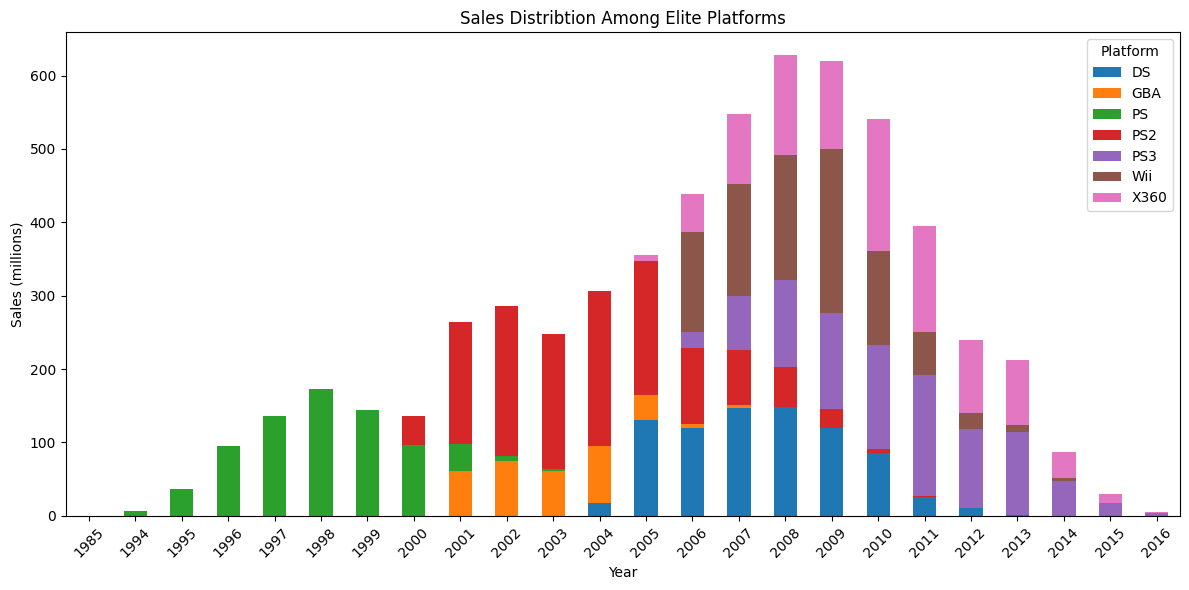

In [32]:
# Pull the top 7 from the platform list
leading_platforms = platform_sales.head(7).index.tolist()

# Filter the df for this analysis
filtered_leading_platforms = df[df['platform'].isin(leading_platforms)]
filtered_leading_platforms = filtered_leading_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack(fill_value=0)

filtered_leading_platforms.plot(kind='bar', stacked=True, figsize=(12,6))

plt.title('Sales Distribtion Among Elite Platforms')
plt.xlabel('Year')
plt.ylabel('Sales (millions)')
plt.legend(title='Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?


#### Charting each popular retro platform

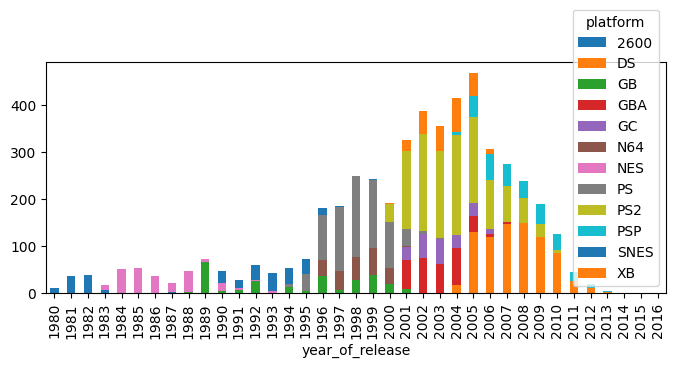

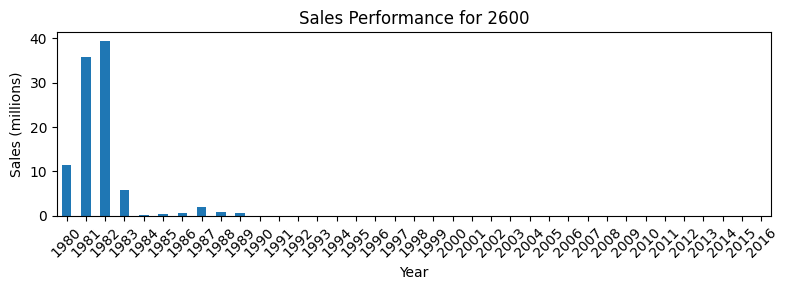

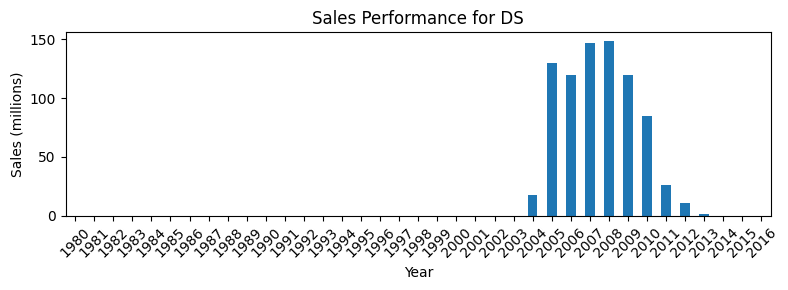

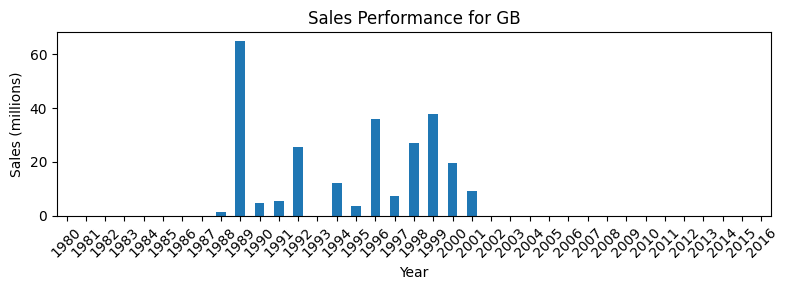

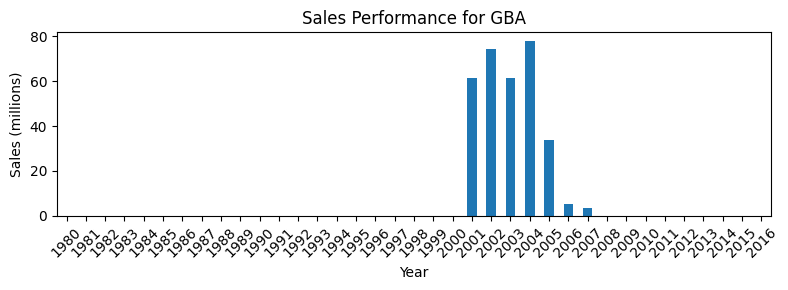

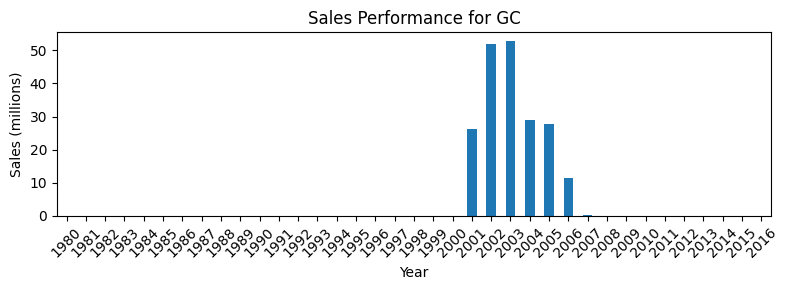

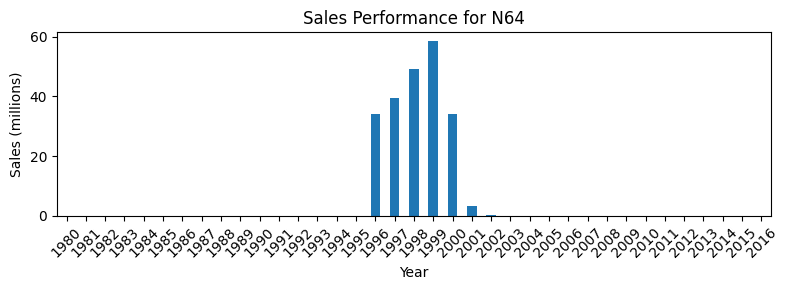

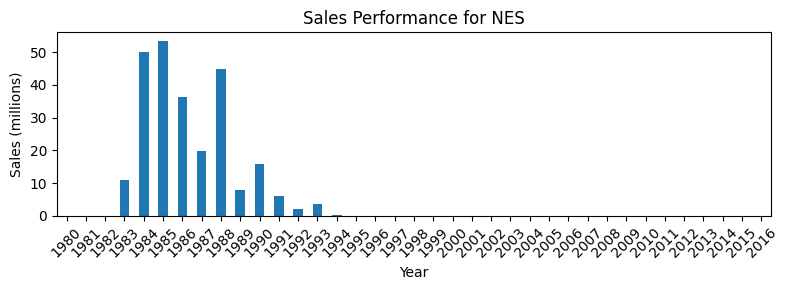

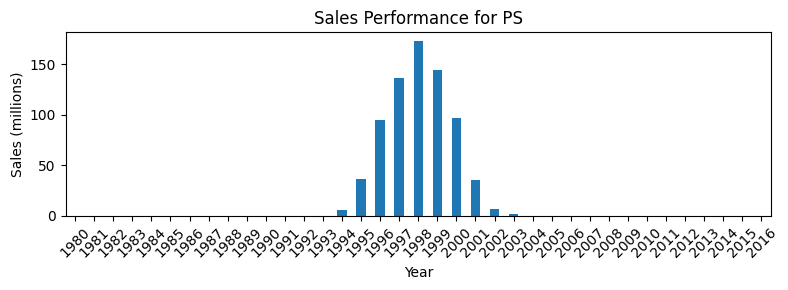

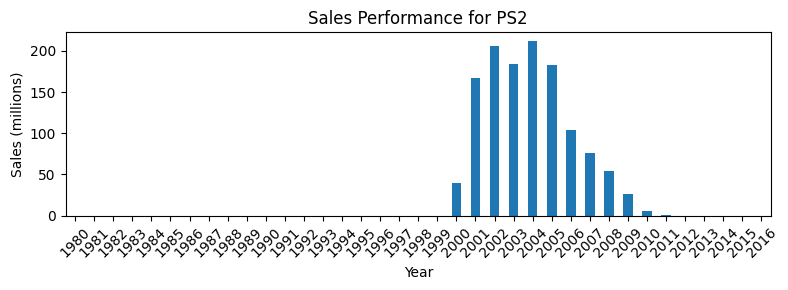

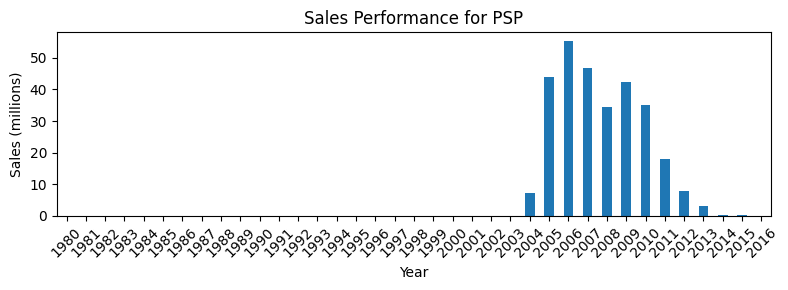

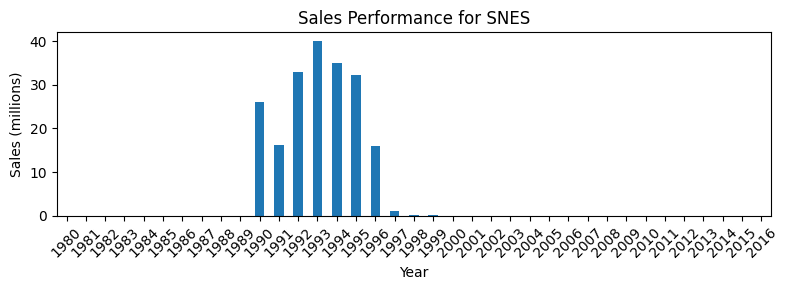

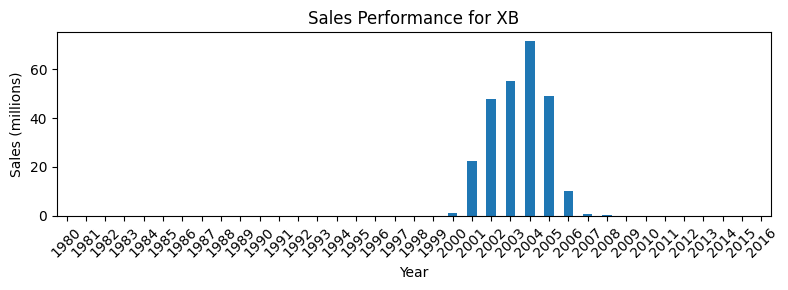

In [33]:
# Pull popular platforms from the list. I believe the top 19 are adequite as their sales are over 100M
popular_platforms = platform_sales.head(19).index.tolist()

# Filter the df for this analysis
filtered_popular_platforms = df[df['platform'].isin(popular_platforms)]

# Filter df again so that it only includes platforms that have 0 sales in 2016.
filtered_retro_platforms = filtered_popular_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack(fill_value=0)
# Identify platforms that have zero sales in 2016
zero_sales_2016 = filtered_retro_platforms.loc[2016] == 0
# Filter the original filtered_retro_platforms to keep only those platforms
filtered_retro_platforms = filtered_retro_platforms.loc[:, zero_sales_2016]
# Get ready to visualize data
filtered_retro_platforms.plot(kind='bar', stacked=True, figsize=(8,3))

# Create a bar chart for each platform separately
for platform in filtered_retro_platforms.columns:
    plt.figure(figsize=(8, 3))
    filtered_retro_platforms[platform].plot(kind='bar', stacked=True)

    plt.title(f'Sales Performance for {platform}')
    plt.xlabel('Year')
    plt.ylabel('Sales (millions)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### Summary of Charts
From the data visualization it appears once a platform begins sales its lifespan is about 7 years. Certain factors contribute to this data other than popularity or sales. For example look at N64 vs CG data. Here Nintendo controlled the wind down of one platform the the start of another.

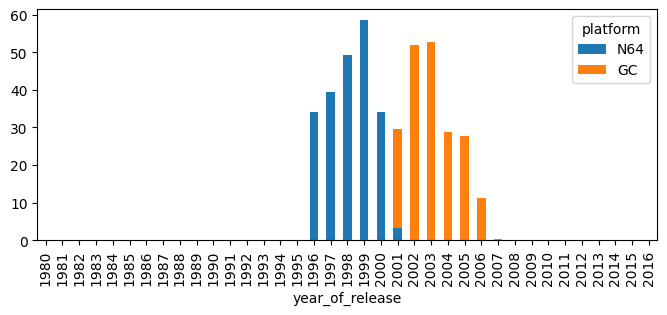

In [34]:
compare_N64_CG = filtered_retro_platforms[['N64','GC']]
compare_N64_CG.plot(kind='bar', stacked=True, figsize=(8,3))
plt.show()


### Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a model for 2017.
Work only with the data that you've decided is relevant. Disregard the data for previous years.
Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.


I believe a platform's lifespan is about 7 years and we are projecting for 2017, lets look at sales across platfroms for the last 10 years. That way I can get a hold of what stage of their life each platform will be in for 2017. Let's also focus on platforms that have recent sales.

### Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? 


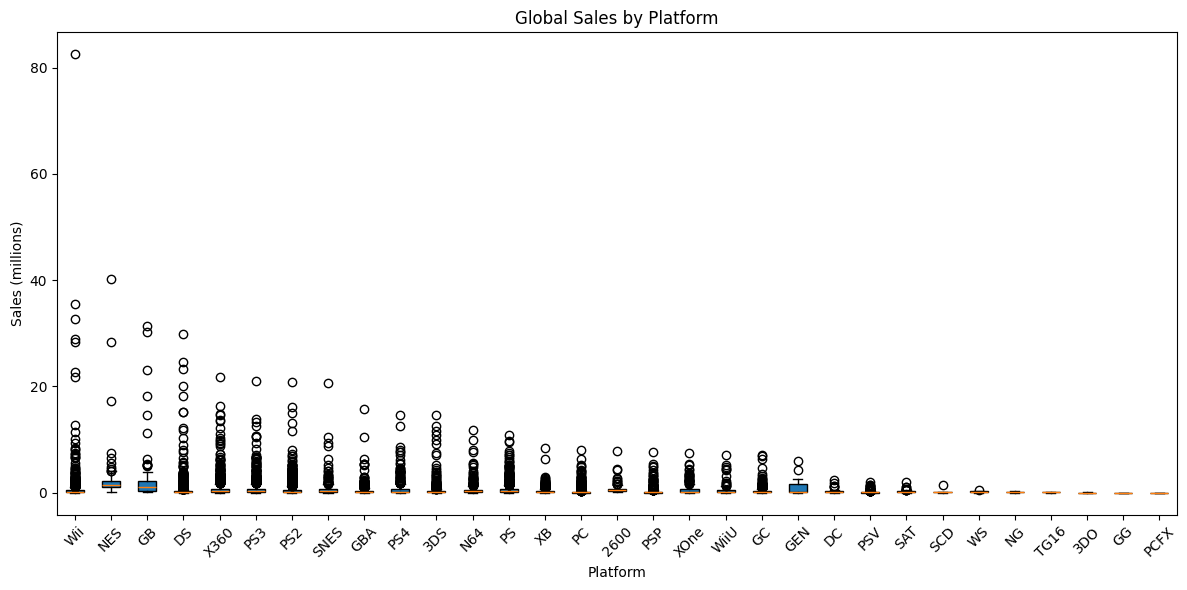

In [35]:
# Set up variables for box plot
all_platforms = df['platform'].unique()
platform_data = [df[df['platform'] == platform]['total_sales'] for platform in all_platforms]
plt.figure(figsize=(12,6))
plt.boxplot(platform_data, tick_labels=all_platforms, patch_artist=True)

plt.title('Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

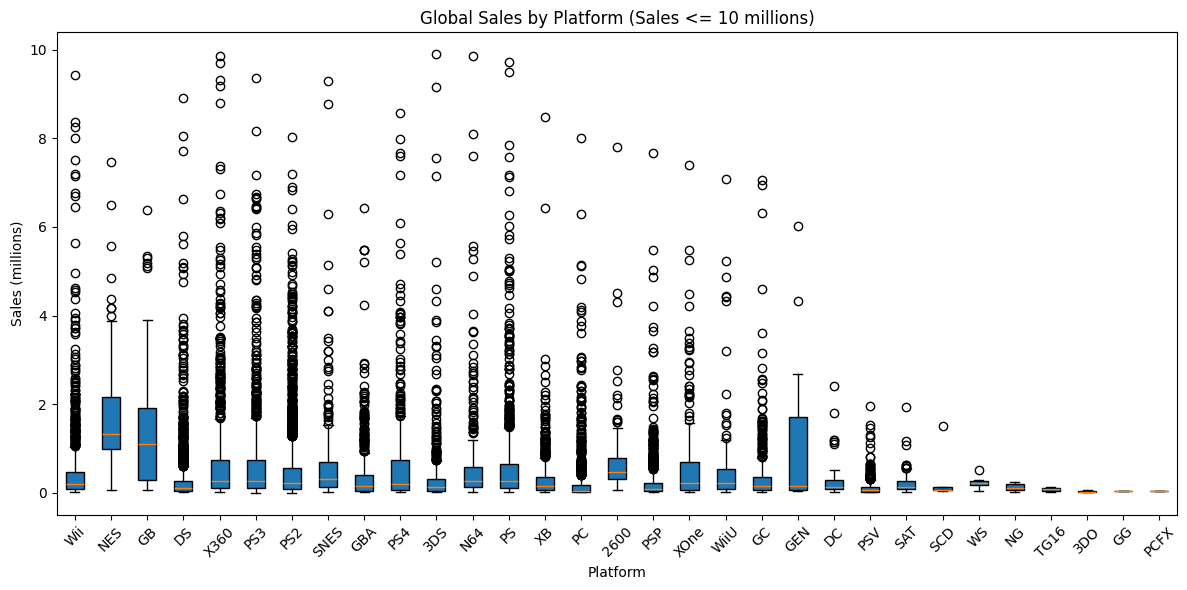

In [36]:
# Remove high end outliers to get a better view of the data, Wii Sports is insane:
filtered_platform_data = [df[(df['platform'] == platform) & (df['total_sales'] <= 10)]['total_sales'] for platform in all_platforms]

plt.figure(figsize=(12,6))
plt.boxplot(filtered_platform_data, tick_labels=all_platforms, patch_artist=True)

plt.title('Global Sales by Platform (Sales <= 10 millions)')
plt.xlabel('Platform')
plt.ylabel('Sales (millions)')

# Set the x-ticks and rotate them for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Based on the box chart it appears there are 3 major standouts in the data (NES, GB, GEN), these are all defunct platforms that took up a greater market share and are probably unreliable here for a 2017 projection.

Looking past the breakout three generally speaking it appears games globally do not have a dramamtic shift in sales across platform.

### What about average sales on various platforms? Describe your findings.

In [37]:
# Calculate the average sales on each platform

average_sales_per_platform = df.groupby('platform')['total_sales'].mean().sort_values(ascending=False)

print(average_sales_per_platform.head(15))

platform
GB      2.606735
NES     2.561735
GEN     1.050000
SNES    0.836987
PS4     0.801378
X360    0.769746
2600    0.729173
PS3     0.707035
Wii     0.687508
N64     0.685517
XOne    0.645020
PS      0.610576
PS2     0.581106
WiiU    0.559116
3DS     0.498077
Name: total_sales, dtype: float64


The top 3 are still present in average global sales across platforms. This must be because of age and increased market share.

Of note, PS4 has a high average sale amount while still being current. What other platforms are current yet have a high rating on this series? Lets analyze 2015 instead of 2016 as we were warned it could be incomplete.

In [38]:

unique_platforms_2015 = ['3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

# Print the list of unique platforms active in 2015
print(unique_platforms_2015)

['3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']


#### Begin filtering by popular platform + sales and chart

<Figure size 1200x600 with 0 Axes>

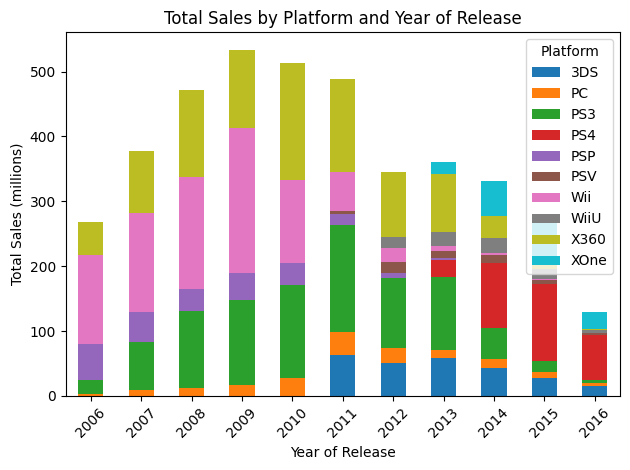

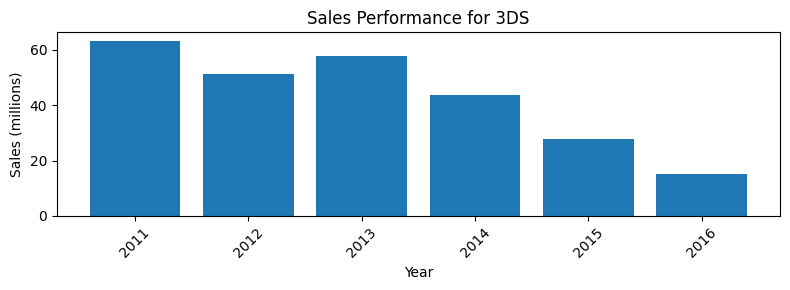

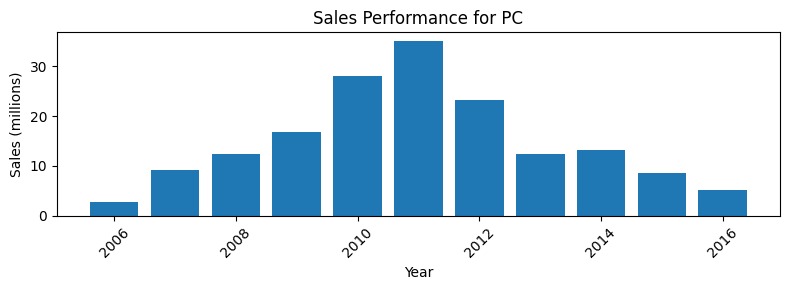

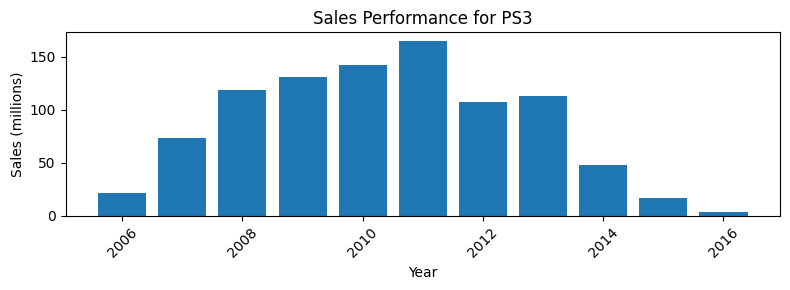

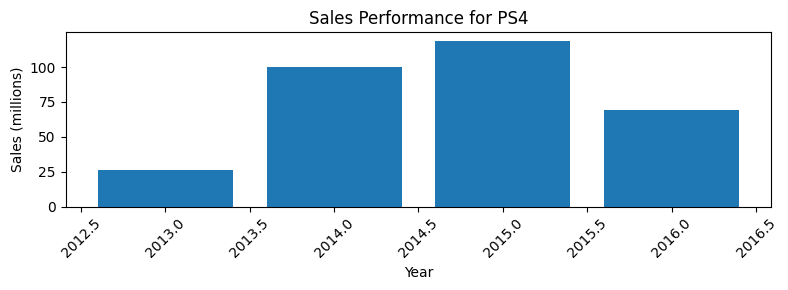

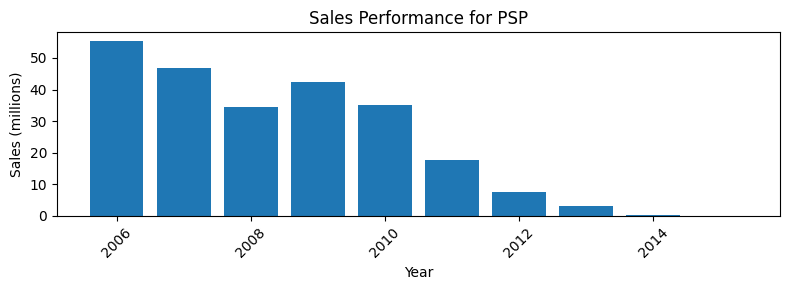

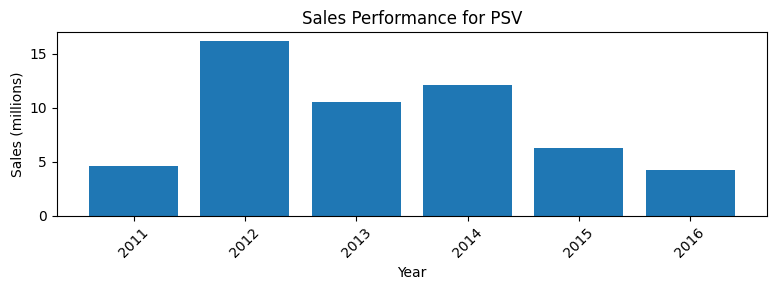

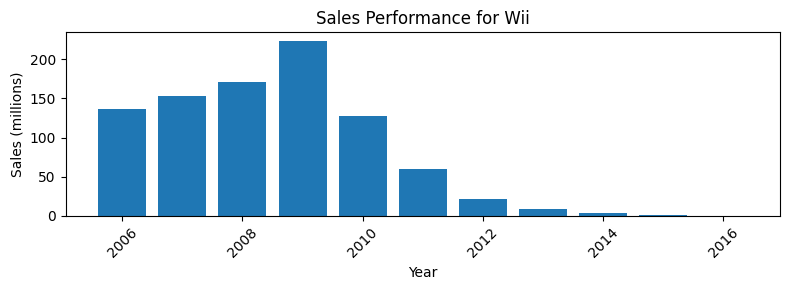

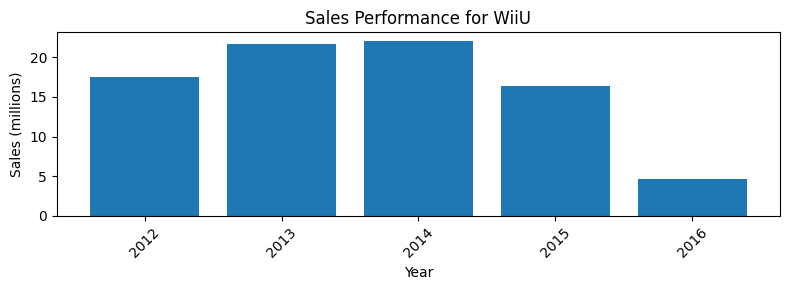

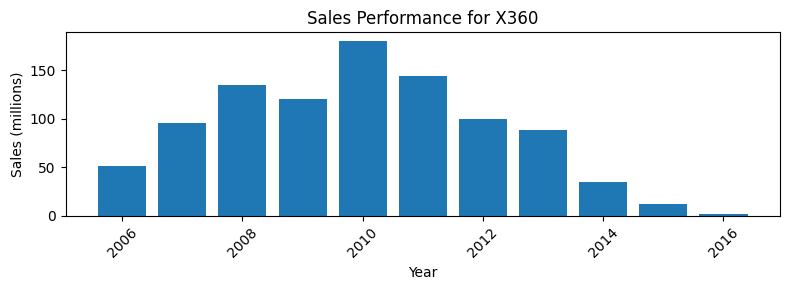

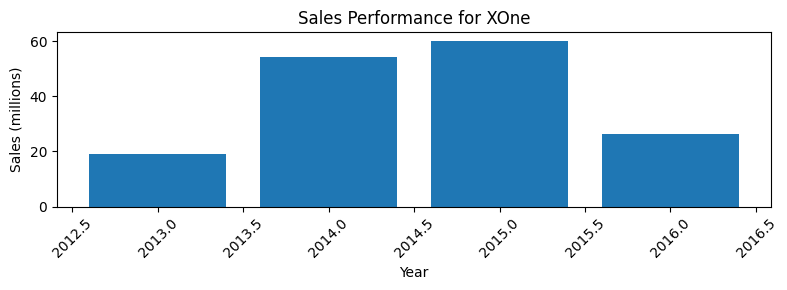

In [39]:
# Based on a previous entry, I've decided to look at around the previous 10 years of data so knowing 2016 is incomplete I will use 2005
research_cutoff_date = 2005
# Based on a previous entry, I've decided to focus on platforms that were active in 2015. This is stored in unique_platforms_2015
relevant_df = df[
    (df['platform'].isin(unique_platforms_2015)) &
    (df['year_of_release'] > research_cutoff_date)]
# Now I need to review where each platform is along its lifecycle, which based on a previous entry, 
# I've decided to use 7 years however each platform will need some cursory research before confirming its age.

grouped_data = relevant_df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Now pivot the grouped data for plotting
pivot_data = grouped_data.pivot(index='year_of_release', columns='platform', values='total_sales')

# Fill NaN values with 0 for better plotting
pivot_data = pivot_data.fillna(0)

# Create the bar plot
plt.figure(figsize=(12, 6))
pivot_data.plot(kind='bar', stacked=True)

plt.title('Total Sales by Platform and Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (millions)')
plt.legend(title='Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

for platform in unique_platforms_2015:
    plt.figure(figsize=(8, 3))
    platform_data = grouped_data[grouped_data['platform'] == platform]
    plt.bar(platform_data['year_of_release'], platform_data['total_sales'], label=platform)

    plt.title(f'Sales Performance for {platform}')
    plt.xlabel('Year')
    plt.ylabel('Sales (millions)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### Summary of charts
See list of potential active platforms below and my summary of the platform:
* 3DS: Ending lifecycle early will not earn above 10. Remove from 2017 consideration.
* PC: Special case. PCs don't really follow the platform model of lifespan. PC should be retained.
* PS3: Ended lifecycle. Remove from 2017 consideration.
* PS4: Growing lifecycle. We should focus on the PS4 platform.
* PSP: Ended lifecycle. Remove from 2017 consideration.
* PSV: Ending lifecycle early will not earn above 5. Remove from 2017 consideration.
* Wii: Ended lifecycle. Remove from 2017 consideration.
* WiiU: Ending lifecycle early. We should keep for 2017 consideration however 2015 sales + Wii drop off matching WiiU chart (previous gen platfrom) is concerning 
* X360: Ended lifecycle. Remove from 2017 consideration. Note for next gen, long lifespan.
* XOne: Growing lifecycle. We should focus on the XOne platform.

It would be wise to focus 2017 efforts on PS4 and XOne while keeping an eye out for potential successful outliers exclusive to the shrinking WiiU platform.

### Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
Keeping your conclusions in mind, compare the sales of the same games on other platforms.

#### Scatter Plots and visualizations:

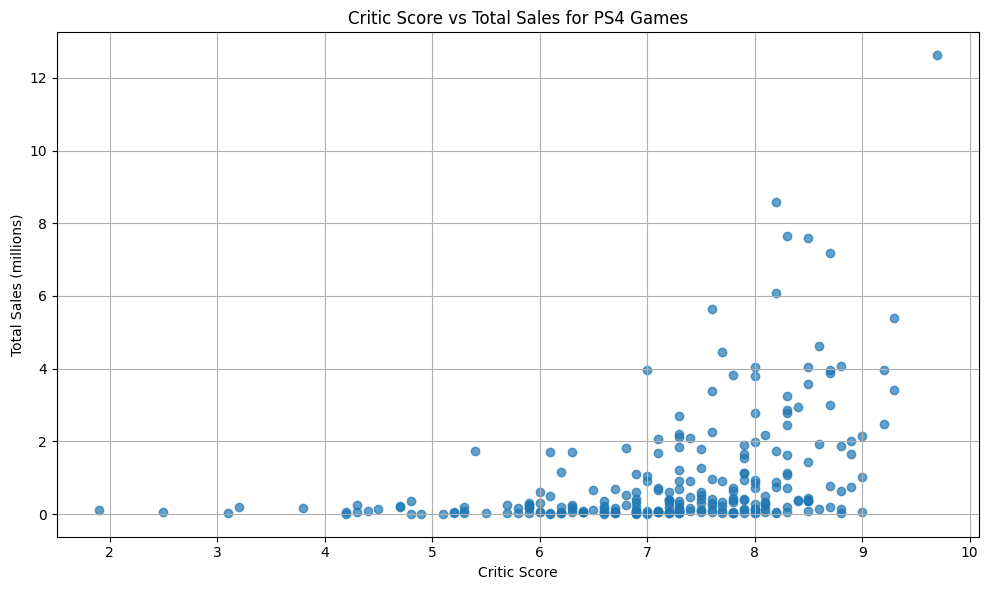

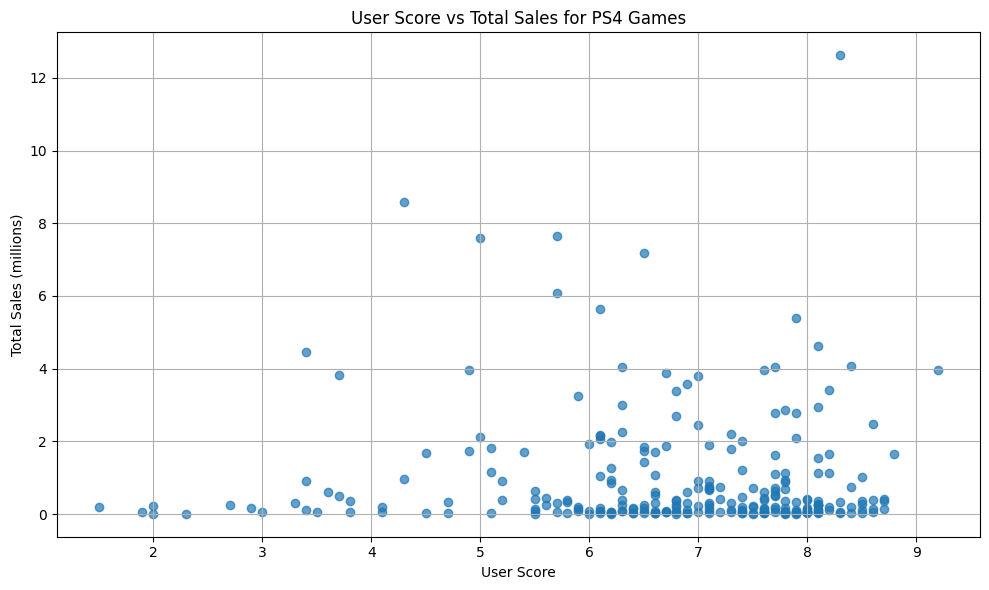

/var/folders/rt/3pvkzf314n746fyn9dq8p5dh0000gn/T/ipykernel_80865/1639689950.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps4_data['ave_score'] = ps4_data.apply(calculate_average_score, axis=1)


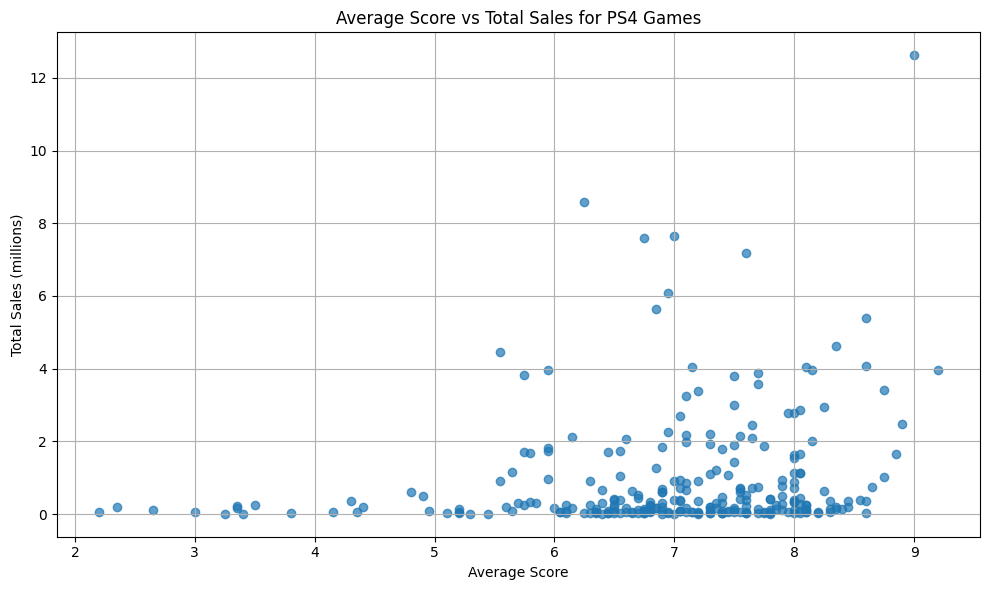

In [40]:
# Let's look at the PS4
ps4_data = df[df['platform'] =='PS4']
# Remove critic_scores where they are missing aka: '0'
ps4_data = ps4_data[ps4_data['critic_score'] != 0]

plt.figure(figsize=(10,6))
plt.scatter(ps4_data['critic_score'], ps4_data['total_sales'], alpha=0.7)
plt.title('Critic Score vs Total Sales for PS4 Games')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millions)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Again but with user_scores
ps4_data = df[df['platform'] =='PS4']
# Remove user_scores where they are missing aka: '0'
ps4_data = ps4_data[ps4_data['user_score'] != 0]

plt.figure(figsize=(10,6))
plt.scatter(ps4_data['user_score'], ps4_data['total_sales'], alpha=0.7)
plt.title('User Score vs Total Sales for PS4 Games')
plt.xlabel('User Score')
plt.ylabel('Total Sales (millions)')
plt.grid(True)

plt.tight_layout()
plt.show()

# A final time but with scores merged together into an average
ps4_data = df[df['platform'] =='PS4']
# This filter step is more complicated.
# Create ave_score
# If both crit and user are = 0, drop. 
# If one of the two scores is missing take the score with value to ave_score
# If both crit and user are !=, average them and add to ave_score

# Define a function to iterate across each row in ps4_data
def calculate_average_score(row):
    crit_score = row['critic_score']
    user_score = row['user_score']
    
    if crit_score == 0 and user_score == 0:
        return None  # Drop this entry
    elif crit_score == 0:
        return user_score  # Use user_score if crit_score is missing
    elif user_score == 0:
        return crit_score  # Use crit_score if user_score is missing
    else:
        return (crit_score + user_score) / 2  # Average both scores

# Apply the function to create a new column ave_score
ps4_data['ave_score'] = ps4_data.apply(calculate_average_score, axis=1)

plt.figure(figsize=(10,6))
plt.scatter(ps4_data['ave_score'], ps4_data['total_sales'], alpha=0.7)
plt.title('Average Score vs Total Sales for PS4 Games')
plt.xlabel('Average Score')
plt.ylabel('Total Sales (millions)')
plt.grid(True)

plt.tight_layout()
plt.show()


#### Correlation and Summary:

In [41]:
ps4_score_sale_corr = ps4_data['user_score'].corr(ps4_data['total_sales'])
print(f"The correlation between USER score and total sales is: {ps4_score_sale_corr:.2f}")
ps4_score_sale_corr = ps4_data['critic_score'].corr(ps4_data['total_sales'])
print(f"The correlation between CRITIC score and total sales is: {ps4_score_sale_corr:.2f}")
ps4_score_sale_corr = ps4_data['ave_score'].corr(ps4_data['total_sales'])
print(f"The correlation between AVERAGE score and total sales is: {ps4_score_sale_corr:.2f}")

The correlation between USER score and total sales is: 0.11
The correlation between CRITIC score and total sales is: 0.23
The correlation between AVERAGE score and total sales is: 0.19


Taking a look at the scatter plots and the correlation data it appears the critic_score is a better indicator of a games success, however overall there is no strong correlation here to speak to.
Other observations:
* Based on the score average any game rated over 8.5 is guaranteed to make 1m
* Games need a critic score of at least 6.0 to have a chance at breakout success

### Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

#### Charting data...

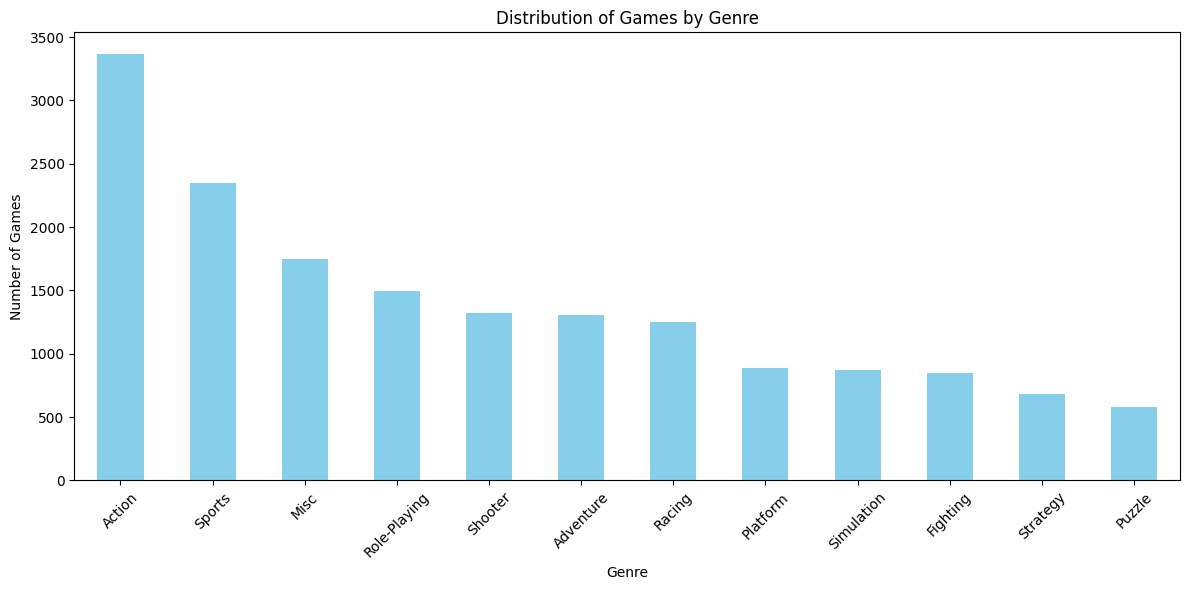

In [42]:
# Chart 1: Distribution of games
genre_distribution = df['genre'].value_counts()

# Plot the genre distribution
plt.figure(figsize=(12, 6))
genre_distribution.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Distribution of Games by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Games')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

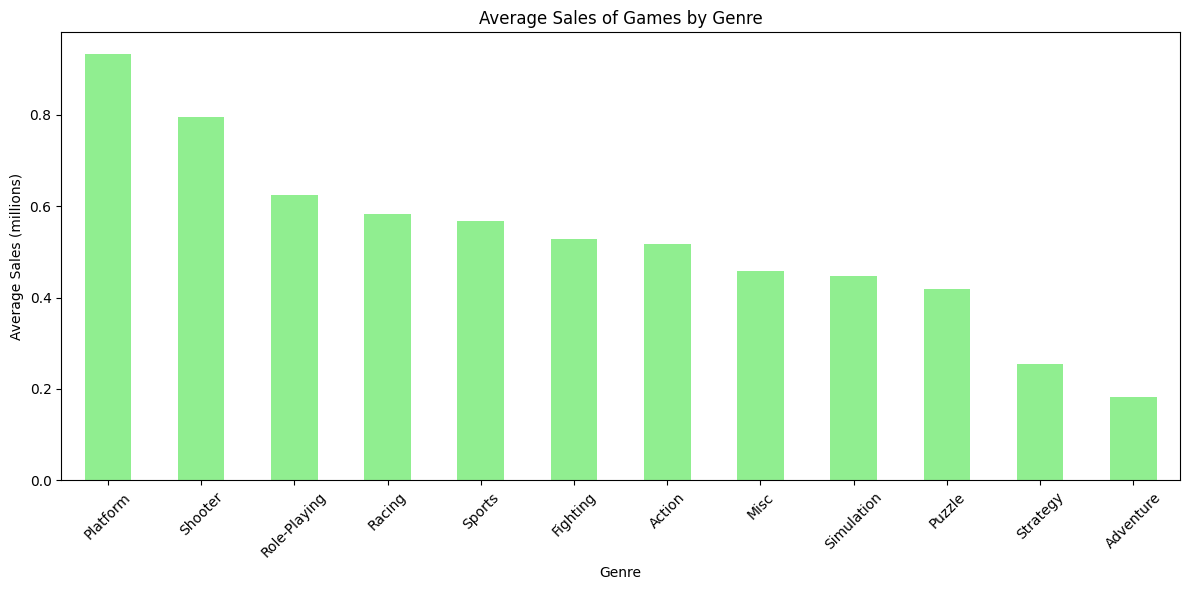

In [43]:
# Chart 2: Average Sales by Genre
average_sales_by_genre = df.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

# Plot the average sales by genre
plt.figure(figsize=(12, 6))
average_sales_by_genre.plot(kind='bar', color='lightgreen')

# Add titles and labels
plt.title('Average Sales of Games by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Sales (millions)')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

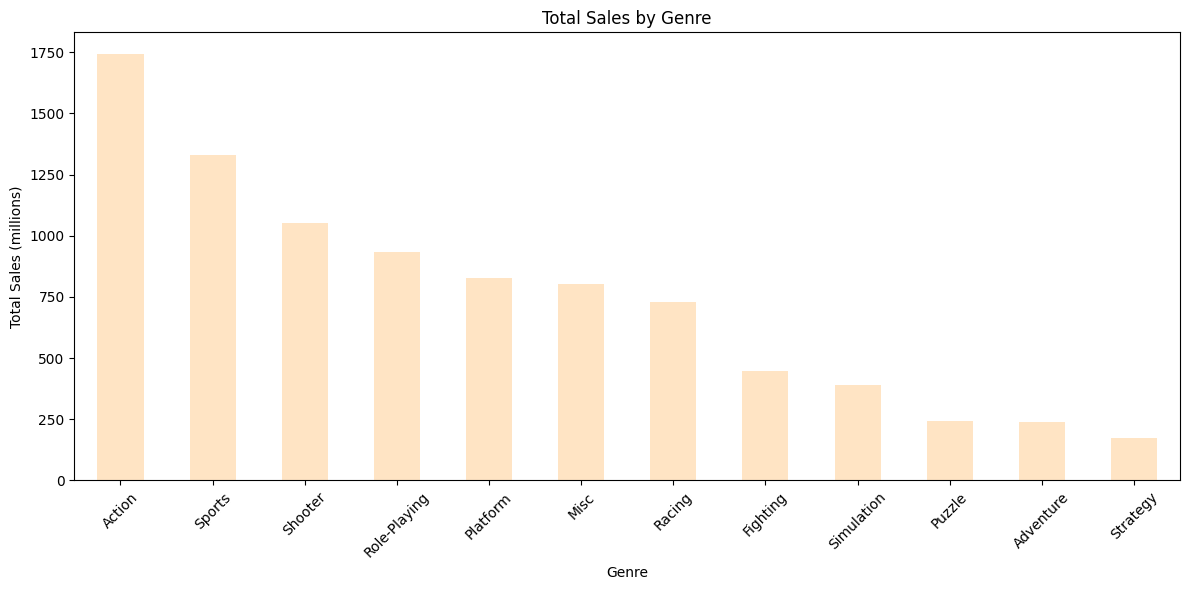

In [44]:
# Chart 3: Total gross sales by Genre

gross_sales_by_genre = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Plot the average sales by genre
plt.figure(figsize=(12, 6))
gross_sales_by_genre.plot(kind='bar', color='bisque')

# Add titles and labels
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

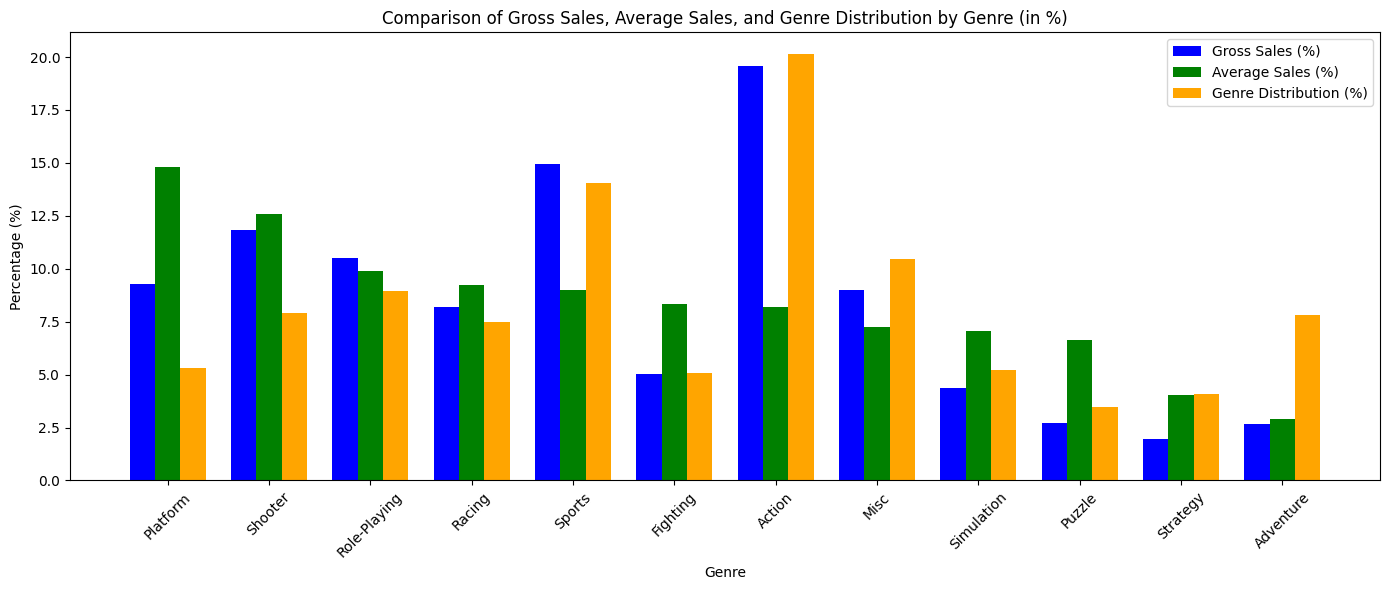

In [45]:
# Let's take all three charts and attempt to display them in one consice chart:
# Step 1: Normalize the dataframes to percentages
gross_sales_percentage = (gross_sales_by_genre / gross_sales_by_genre.sum()) * 100
average_sales_percentage = (average_sales_by_genre / average_sales_by_genre.sum()) * 100
genre_distribution_percentage = (genre_distribution / genre_distribution.sum()) * 100

# Step 2: Create a combined dataframe for plotting
combined_df = pd.DataFrame({
    'Gross Sales (%)': gross_sales_percentage,
    'Average Sales (%)': average_sales_percentage,
    'Genre Distribution (%)': genre_distribution_percentage
})

# Sort by average sales as this is probably the most useful statistic to find successful games.
combined_df = combined_df.sort_values(by='Average Sales (%)', ascending=False)

# Step 3: Plot the bar chart
plt.figure(figsize=(14, 6))

# Create an index for the x-axis locations
x = np.arange(len(combined_df))

# Width of each bar
bar_width = 0.25

# Plot each bar group
plt.bar(x - bar_width, combined_df['Gross Sales (%)'], width=bar_width, label='Gross Sales (%)', color='blue')
plt.bar(x, combined_df['Average Sales (%)'], width=bar_width, label='Average Sales (%)', color='green')
plt.bar(x + bar_width, combined_df['Genre Distribution (%)'], width=bar_width, label='Genre Distribution (%)', color='orange')

# Step 4: Add labels, title, and legend
plt.xlabel('Genre')
plt.ylabel('Percentage (%)')
plt.title('Comparison of Gross Sales, Average Sales, and Genre Distribution by Genre (in %)')

# Add genre labels to x-axis
plt.xticks(x, combined_df.index, rotation=45)

# Add a legend
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()


The above chart combines all three of the previous charts along a y-axis determined by each individual charts percentage. This chart doesn't provide any hard numbers however it does provide an easier, overall view of the data COMPARATIVELY, which is what I'm currently after. 

I am interested in reviewer feedback on this chart, I feel pretty good about it and I came up with it myself. Please give me guidance if this was a good way to compare data or what pitfalls I might be missing of this chart...

#### In summary of comparison betweeen genres I have come to the following conclusions:
First I must determine an order as to which genres appear riskier to market:
* Genres with the greatest risk are those with a high orange bar relative to its others:
    * Action and Sports genres carry a lot of risk- outliers may run the genre...
    * The Adventure genre carries the most risk and don't appear to even support outlier potential for breakout sales.
* Genres with a large green bar indicate the genre is generally successful:
    * Platform and Shooter genres are obvious easy bets as they are towards the front end of the chart
    * Fighting and Pullze genres are less prevelent in the market but also seem to be generally successful.
* Genres with similar valued bars are less attractive to advertise for however not incredibly risky:
    * Role-Playing, Racing, and Simulation skew more positive
    * Remaining genres, Misc, Strategy skew riskier.

# Step 4 Region Profiles and ESRB

## Profile data:

### North America

In [46]:
# Top 5 Platforms
na_top_platforms = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
print(na_top_platforms.head(5))

# Top 5 Genres
na_top_genres = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
print(na_top_genres.head(5))


platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64


### Europe

In [47]:
# Top 5 Platforms
eu_top_platforms = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
print(eu_top_platforms.head(5))
# Top 5 Genres
eu_top_genres = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
print(eu_top_genres.head(5))

platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64


### Japan

In [48]:
# Top 5 Platforms
jp_top_platforms = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
print(jp_top_platforms.head(5))
# Top 5 Genres
jp_top_genres = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
print(jp_top_genres.head(5))

platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


## Comparisons between profiles:


#### Platforms by Region

  platform  jp_sales  eu_sales  na_sales  total_regional_sales
8     X360     12.43    270.76    602.47                885.66
6      Wii     69.33    262.21    496.90                828.44
2      PS3     80.19    330.29    393.49                803.97
3      PS4     15.96    141.09    108.74                265.79
4      PSP     76.78     66.68    109.17                252.63
0      3DS    100.67     61.48     83.49                245.64
1       PC      0.17    142.44     94.53                237.14
9     XOne      0.34     51.59     93.12                145.05
7     WiiU     13.01     25.13     38.10                 76.24
5      PSV     21.91     13.12     12.58                 47.61


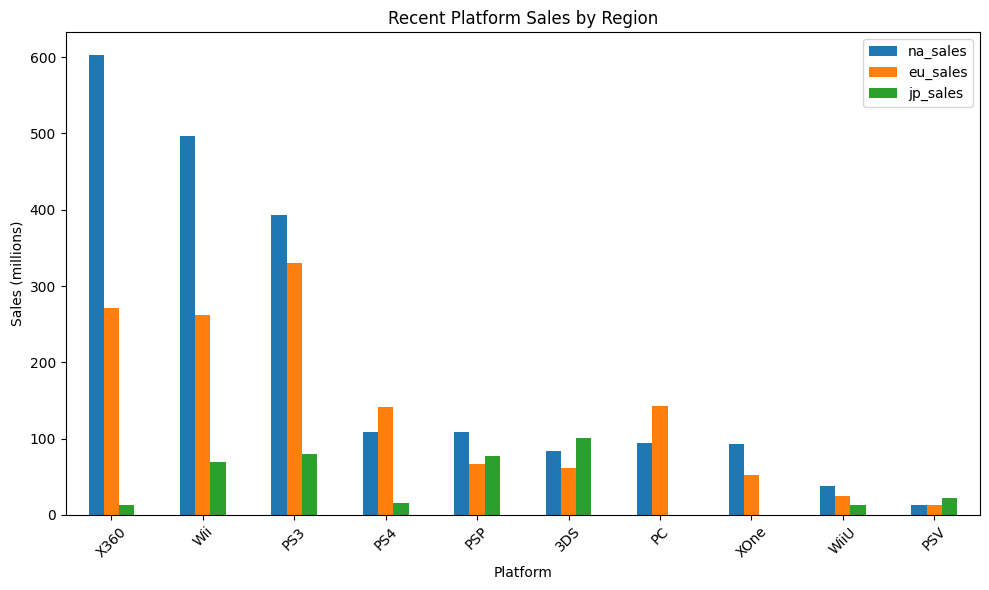

In [49]:
# Convert Series to DataFrame if needed
jp_top_platforms = jp_top_platforms.reset_index()
eu_top_platforms = eu_top_platforms.reset_index()
na_top_platforms = na_top_platforms.reset_index()

# Combine individual dfs 
region_platform_popularity = jp_top_platforms.merge(eu_top_platforms, on='platform', how='outer', suffixes=('_jp', '_eu'))
region_platform_popularity = region_platform_popularity.merge(na_top_platforms, on='platform', how='outer')
region_platform_popularity = region_platform_popularity.rename(columns={'total_sales': 'total_sales_na'})

recent_region_platform_popularity = region_platform_popularity[region_platform_popularity['platform'].isin(unique_platforms_2015)]
recent_region_platform_popularity = recent_region_platform_popularity.reset_index(drop=True)
recent_region_platform_popularity['total_regional_sales'] = recent_region_platform_popularity['na_sales'] + recent_region_platform_popularity['eu_sales'] + recent_region_platform_popularity['jp_sales']
recent_region_platform_popularity = recent_region_platform_popularity.sort_values('total_regional_sales', ascending=False)
print(recent_region_platform_popularity)


recent_region_platform_popularity.set_index('platform', inplace=True)
regions = ['na_sales', 'eu_sales', 'jp_sales']
recent_region_platform_popularity[regions].plot(kind='bar', figsize=(10, 6))

plt.title('Recent Platform Sales by Region')
plt.xlabel('Platform')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



After compiling platform sales by region and sorting them by total sales we can make the following observations:
* na_sales dominate the most popular platforms
* jp_sales are relatively negligible when you look at most platforms
    * Both jp leading platforms (3DS, PSV) platforms have been deemed not important for 2017 projections.
* Remembering the 3 platforms I want to focus on (PS4, XOne, WiiU):
    * PS4: Based on previous gen successful platforms, it is a good sign that eu_sales is above na_sales because history shows na_sales will be greater in the long run.
    * XOne: Concerning that there are no jp_sales in the dataset. This could be due to missing data, regional difficulties with delivering games, or no interest.
    * WiiU: Low sales, contributes to my suspicion that the WiiU is not a great platform to persue.

#### Genres by Region

<Figure size 1000x600 with 0 Axes>

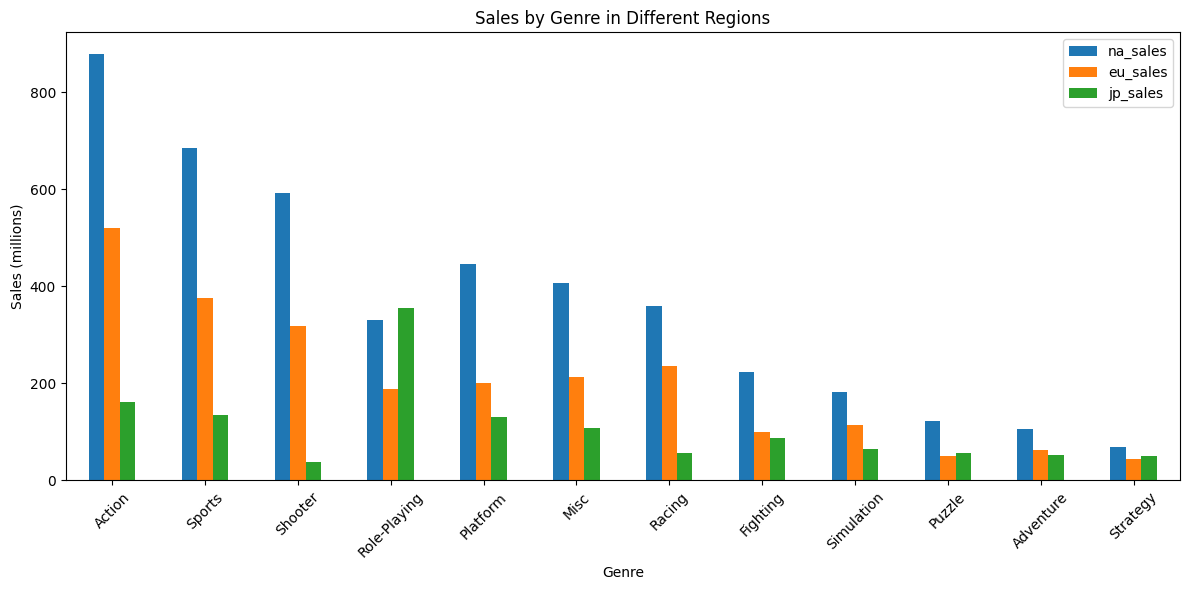

In [50]:
# Organize data
na_top_genres = na_top_genres.reset_index()
na_top_genres = na_top_genres.rename(columns={'sales': 'na_sales'})

eu_top_genres = eu_top_genres.reset_index()
eu_top_genres = eu_top_genres.rename(columns={'sales': 'eu_sales'})

jp_top_genres = jp_top_genres.reset_index()
jp_top_genres = jp_top_genres.rename(columns={'sales': 'jp_sales'})



# Merge the DataFrames on 'genre'
genre_sales = na_top_genres.merge(eu_top_genres, on='genre', how='outer').merge(jp_top_genres, on='genre', how='outer')

genre_sales['total_sales'] = genre_sales['na_sales'] + genre_sales['eu_sales'] + genre_sales['jp_sales']
genre_sales = genre_sales.sort_values('total_sales', ascending=False)

# Fill missing values with 0 (optional, if some genres don't have sales data in all regions)
genre_sales.fillna(0, inplace=True)

# Set 'genre' as the index
genre_sales.set_index('genre', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
genre_sales[['na_sales', 'eu_sales', 'jp_sales']].plot(kind='bar', figsize=(12, 6))

# Add title and labels
plt.title('Sales by Genre in Different Regions')
plt.xlabel('Genre')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

After compiling genre sales by region and sorting by total sales I make the following observations: 
* A new potential outlier has appeared. The jp_sales market for Role-Playing games is abnormally high compared to other genres.
* Other than Role-Playing genre outlier, genre popularity does not change much across the three regions:
    * na_sales generally 30-50% higher than eu_sales
    * jp_sales generally lower than eu_sales however this amount varies however is small compared to na_sales.

## ESRB Affect

    rating  na_sales  eu_sales  jp_sales
0       AO      1.26      0.61      0.00
1        E   1295.55    710.52    199.57
2     E10+    353.32    188.52     40.20
3       EC      1.53      0.11      0.00
4        M    748.48    483.97     64.24
5       RP      0.00      0.08      0.00
6        T    759.75    427.03    151.40
7  unknown   1240.68    613.30    841.93


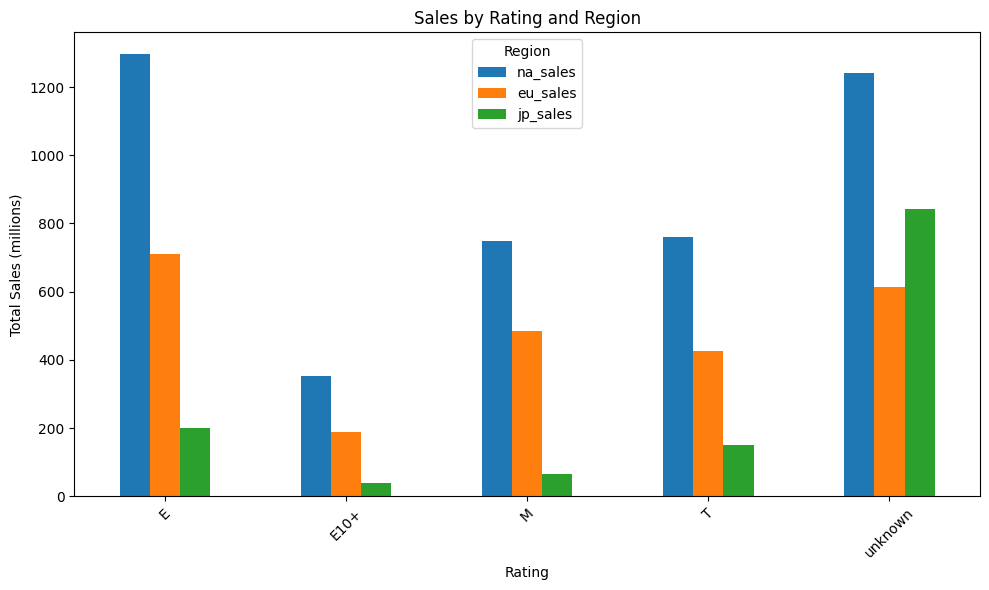

In [51]:
na_rating = df.groupby('rating')['na_sales'].sum().sort_values(ascending=False).reset_index()
eu_rating = df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index()
jp_rating = df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index()

rating_df = na_rating.merge(eu_rating, on='rating', how='outer').merge(jp_rating, on='rating', how='outer')
print(rating_df)

# AO EC and RP are negligible, remove them.
to_remove_ratings = ['AO', 'EC', 'RP']
rating_df = rating_df[~rating_df['rating'].isin(to_remove_ratings)]


rating_df.plot(x='rating', kind='bar', figsize=(10, 6))

# Adding title and labels
plt.title('Sales by Rating and Region')
plt.xlabel('Rating')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()  # Adjusts the plot to fit into the figure area.
plt.show()

"Do ESRB ratings have an affect on sales in individual regions?"

No.

# Step 5 Test Hypotheses



## Explain Test Setup

I have formulated the null and alternative hypotheses by adjusting the given materials so that both Hypotheses 'H0' is indeed a null hypothesis where no change is the preference.

I have chosen a significance level of 5% because that is the only significance level I have experience with and I don't have a reason to deviate from the default.

## Hypotheses

### Hypothesis 1
H0: The average user ratings of the Xbox One and PC platforms are the same.

HA: The average user ratings of the XBox One and PC platforms are different.

In [52]:
xone_ratings = df.loc[df['platform'] == 'XOne', 'user_score']
pc_ratings = df.loc[df['platform'] == 'PC', 'user_score']
if xone_ratings.empty or pc_ratings.empty:
    print("One of the platforms has no ratings.")
else:
    # Perform the independent t-test
    t_statistic, p_value = st.ttest_ind(xone_ratings, pc_ratings, equal_var=False)  # Use equal_var=False for Welch's t-test

    # Print the results
    print(f'P-value: {p_value}')

    # Interpret the p-value
    alpha = 0.05  # significance level
    if p_value < alpha:
        print("Reject the null hypothesis (H0): The average user ratings of the Xbox One and PC platforms are different.")
    else:
        print("Fail to reject the null hypothesis (H0): The average user ratings of the Xbox One and PC platforms are the same.")

P-value: 0.0005315801015576501
Reject the null hypothesis (H0): The average user ratings of the Xbox One and PC platforms are different.


### Hypothesis 2
H0: The average user ratings for the action and sports genres are the same.

HA: The average user ratings for the action and sports genres are different.

In [53]:


action_ratings = df.loc[df['genre'] == 'Action', 'user_score']
sports_ratings = df.loc[df['genre'] == 'Sports', 'user_score']
if action_ratings.empty or sports_ratings.empty:
    print("One of the genres has no ratings.")
else:
    # Perform the independent t-test
    t_statistic, p_value = st.ttest_ind(action_ratings, sports_ratings, equal_var=False)  # Use equal_var=False for Welch's t-test

    # Print the results
    print(f'P-value: {p_value}')

    # Interpret the p-value
    alpha = 0.05  # significance level
    if p_value < alpha:
        print("Reject the null hypothesis (H0): The average user ratings of the Xbox One and PC platforms are different.")
    else:
        print("Fail to reject the null hypothesis (H0): The average user ratings of the Xbox One and PC platforms are the same.")

P-value: 1.103671322295375e-08
Reject the null hypothesis (H0): The average user ratings of the Xbox One and PC platforms are different.


# Step 6 Conclusion

Based on the data provided I have come to the following conclusions for a 2017 marketing campaign:

* Platforms
    * PS4 should be the ultimate focus
        * Data suggests the PS4 is in the growing phase of its lifecycle
        * Data suggests a growth spurt in the NA region has yet to occur, could begin in 2017
    * XOne should be a main focus
        * Data suggests the XOne is in the growing phase of its lifecycle
* Genres
    * Platform
        * Data suggests while not the most popular genre Platformers have a greater average earning potential
    * Shooter
        * Data suggests while not the most popular genre Shooters have a greater average earning potential
* Regions
    * North American region is the most active according to the data
    * If a region needed to be dropped the data suggests the Japanese market as it is the smallest


* Outliers to watch
    * WiiU platform with historially popular game franchises
        * This platform should be in the growing phase however data suggests it is floundering early
        * I would be remiss to not mention Wii Sports as an outlier on the Wii where WiiU has yet to meet an equivelenat
    * Role-Playing genre in jp region
        * Data suggests the jp region has greater sales in the Role-Playing genre compared to any other genre
        * Target marketing in jp region would be less risky in this genre